In [29]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation
import sympy as syms

x = np.matrix([
    [0, 0, 0, 1],
    [1, 0, 0, 1],
    [1, 0, 1, 1],
    [1, 1, 0, 1],

    [0, 0, 1, -1],
    [0, 1, 1, -1],
    [0, 1, 0, -1],
    [1, 1, 1, -1],
])

In [47]:
x0, x1, x2, k = syms.symbols('x0,x1,x2 k');
alpha = 1;
k = syms.exp(-alpha * ((x0 - x[0, 0]) ** 2 + (x1 - x[0, 1]) ** 2 + (x2 - x[0, 2]) ** 2))

step = 0;
count = 0;
while 1:
    step = step + 1;
    print("%d代" % (step))
    i = step % 8;
    if k.subs({x0: x[i, 0], x1: x[i, 1], x2: x[i, 2]}) * x[i, -1] < 0:
        k = k + x[i, -1] * syms.exp(-alpha * ((x0 - x[i, 0]) ** 2 + (x1 - x[i, 1]) ** 2 + (x2 - x[i, 2]) ** 2));
        count = 0;
    else:
        count = count + 1;

    print(k)
    if count == 8:
        break;

1代
exp(-x0**2 - x1**2 - x2**2)
2代
exp(-x0**2 - x1**2 - x2**2)
3代
exp(-x0**2 - x1**2 - x2**2)
4代
exp(-x0**2 - x1**2 - x2**2) - exp(-x0**2 - x1**2 - (x2 - 1)**2)
5代
exp(-x0**2 - x1**2 - x2**2) - exp(-x0**2 - x1**2 - (x2 - 1)**2)
6代
exp(-x0**2 - x1**2 - x2**2) - exp(-x0**2 - x1**2 - (x2 - 1)**2) - exp(-x0**2 - x2**2 - (x1 - 1)**2)
7代
exp(-x0**2 - x1**2 - x2**2) - exp(-x0**2 - x1**2 - (x2 - 1)**2) - exp(-x0**2 - x2**2 - (x1 - 1)**2)
8代
exp(-x0**2 - x1**2 - x2**2) - exp(-x0**2 - x1**2 - (x2 - 1)**2) - exp(-x0**2 - x2**2 - (x1 - 1)**2)
9代
exp(-x0**2 - x1**2 - x2**2) - exp(-x0**2 - x1**2 - (x2 - 1)**2) - exp(-x0**2 - x2**2 - (x1 - 1)**2)
10代
exp(-x0**2 - x1**2 - x2**2) - exp(-x0**2 - x1**2 - (x2 - 1)**2) - exp(-x0**2 - x2**2 - (x1 - 1)**2) + exp(-x1**2 - (x0 - 1)**2 - (x2 - 1)**2)
11代
exp(-x0**2 - x1**2 - x2**2) - exp(-x0**2 - x1**2 - (x2 - 1)**2) - exp(-x0**2 - x2**2 - (x1 - 1)**2) + exp(-x1**2 - (x0 - 1)**2 - (x2 - 1)**2) + exp(-x2**2 - (x0 - 1)**2 - (x1 - 1)**2)
12代
exp(-x0**2 - x1**2 - x2

In [50]:
fig = plt.figure();
ax = fig.add_subplot(111, projection="3d")
ax = Axes3D(fig);
X, Y, Z = x[:, 0], x[:, 1], x[:, 2]

In [51]:
ax.scatter(X[0:4].tolist(), Y[0:4].tolist(), Z[0:4].tolist(), c='r', alpha=1);

In [52]:
ax.scatter((-X[4:8]).tolist(), (-Y[4:8]).tolist(), (-Z[4:8]).tolist(), c='b', alpha=1);

In [53]:
wx = np.linspace(-1, 1, 15);
for i in wx:
    for j in wx:
        for z in wx:
            # print(k.subs({x0:i,x1:j,x2:z}))
            if k.subs({x0: i, x1: j, x2: z}) <= 0:
                ax.scatter(i, j, z, c='r', alpha=0.1);

            else:
                ax.scatter(i, j, z, c='b', alpha=0.1);

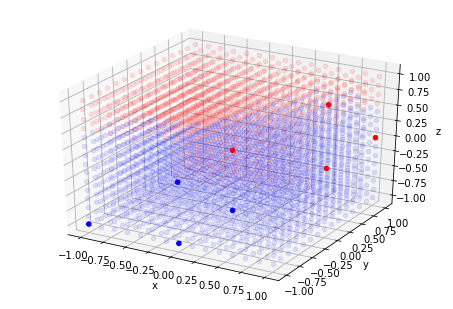

In [54]:
# # # 设置坐标轴范围
# ax.set_xlim(0, 1)
# ax.set_ylim(0, 1)
# ax.set_zlim(-0.25, 1.25)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()